# Sentiment -Modeling

In [ ]:
import nltk
nltk.download("stopwords")

from nltk.corpus import stopwords
stop = stopwords.words("english")

import pandas as pd
import numpy as np
import itertools
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, f1_score, accuracy_score, precision_score, recall_score
from sklearn.svm import LinearSVC
from sklearn import set_config
from sklearn.model_selection import StratifiedKFold, cross_val_score, GridSearchCV
import joblib

set_config(display='diagram')

import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Abdul\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Reading the files

In [ ]:
cd_sent = pd.read_csv("cd_data_final.csv")
office_sent = pd.read_csv("office_data_final.csv")

In [ ]:
print("CD Vinyl DATASET SHAPE:",cd_sent.shape)

CD Vinyl DATASET SHAPE: (980929, 30)


In [ ]:
print("Office Products DATASET SHAPE:",office_sent.shape)

Office Products DATASET SHAPE: (562378, 30)


In [ ]:
cd_sent.head()

,reviewerID,asin,verified,review,ratings,date,summary,unixReviewTime,category,description,...,Sentiment,word_count,char_count,avg_word,polarity,label,year,rating_class_num,review_length,review_length_bin
0,A2LBDC9ZGSCAE6,0005164885,True,christmas tso goes together like rudolph santa,5.0,2018-02-22,TSO...what more do you need to know?,1519257600,"['CDs & Vinyl', 'Holiday & Wedding']","['This is a concept album all the way, with ta...",...,Positive,7,46,5.7,0.000000,1.0,2018,1,7,"(0, 100]"
1,A2ZB6AHRM0ZLLW,0005164885,True,good,4.0,2018-02-14,Four Stars,1518566400,"['CDs & Vinyl', 'Holiday & Wedding']","['This is a concept album all the way, with ta...",...,Positive,1,4,4.0,0.700000,1.0,2018,1,1,"(0, 100]"
2,A1LU1VWVVCU85F,0005164885,True,good sound holiday,5.0,2018-02-10,nice,1518220800,"['CDs & Vinyl', 'Holiday & Wedding']","['This is a concept album all the way, with ta...",...,Positive,3,18,5.3,0.550000,1.0,2018,1,3,"(0, 100]"
3,A3VUWBZF2U32TJ,0005164885,True,item arrived quickly described,5.0,2018-01-28,Five Stars,1517097600,"['CDs & Vinyl', 'Holiday & Wedding']","['This is a concept album all the way, with ta...",...,Positive,4,30,6.7,0.333333,1.0,2018,1,4,"(0, 100]"
4,AV3DKV2TW5B3C,0005164885,True,great album,5.0,2018-01-10,Five Stars,1515542400,"['CDs & Vinyl', 'Holiday & Wedding']","['This is a concept album all the way, with ta...",...,Positive,2,11,5.0,0.800000,1.0,2018,1,2,"(0, 100]"


In [ ]:
office_sent.shape

(562378, 30)

In [ ]:
cd_sent.isnull().sum()

reviewerID           0
asin                 0
verified             0
review               1
ratings              0
date                 0
summary              0
unixReviewTime       0
category             0
description          0
title                0
brand                0
price                0
imageURL             0
subcategory          0
stopwords            0
punctuation          0
numerics             0
upper                0
rating_class         0
Sentiment            0
word_count           0
char_count           0
avg_word             0
polarity             0
label                0
year                 0
rating_class_num     0
review_length        0
review_length_bin    4
dtype: int64

In [ ]:
office_sent.isnull().sum()

ratings                  0
verified                 0
date                     0
reviewerID               0
asin                     0
review                   1
summary                  9
unixReviewTime           0
category                 0
description              0
title                   75
brand                  907
price                    0
imageURL                 0
subcategory          22051
stopwords                0
punctuation              0
numerics                 0
upper                    0
rating_class             0
Sentiment                0
word_count               0
char_count               0
avg_word                 0
polarity                 0
label                    0
year                     0
rating_class_num         0
review_length            0
review_length_bin        2
dtype: int64

In [ ]:

cd_sent.dropna(inplace = True)

In [ ]:


office_sent.dropna(inplace = True)

In [ ]:
cd_sent.shape

(980924, 30)

In [ ]:
office_sent.shape

(539446, 30)

## AMAZON REVIEWS ANALYSIS - CD-Vinyl

In [ ]:
#SAMPLING THE DATA INTO A BALANCED DATASET 

In [ ]:


# Separate majority and minority classes
cd_pos = cd_sent[cd_sent['Sentiment']=='Positive']
cd_neu = cd_sent[cd_sent['Sentiment']=='Neutral']
cd_neg = cd_sent[cd_sent['Sentiment']=='Negative']
 

df_cd_pos = resample(cd_pos, 
                                 replace=False,    
                                 n_samples=35000)

df_cd_neu = resample(cd_neu, 
                                 replace=True,     
                                 n_samples=35000)

df_cd_neg = resample(cd_neg, 
                        replace=True, n_samples=35000)

# Combine minority class with downsampled majority class
cd_df = pd.concat([df_cd_pos, df_cd_neu,df_cd_neg])

In [ ]:
cd_df.shape

(105000, 30)

## SPLITING THE DATASET INTO TRAIN AND TEST

In [ ]:
X = cd_df["review"]
y = cd_df["Sentiment"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

## Pipeline Model

In [ ]:
f1_list = []
recall_list = []
precision_list = []
train_accuracy_list = []
test_accuracy_list = []

def f1_score1(precision,recall):
    f1 = 2*(precision * recall)/(precision + recall)
    return f1

In [ ]:

def evaluation(pipeline):
    pipeline = pipeline.fit(X_train, y_train)
    global accuracy_train, accuracy_test, precision1, recall1, f1_score, y_pred_test, y_pred_train
  
    y_pred_train = pipeline.predict(X_train)
    y_pred_test = pipeline.predict(X_test)

    accuracy_train=accuracy_score(y_train, y_pred_train)
    accuracy_test=accuracy_score(y_test, y_pred_test)
    precision1 = precision_score(y_test, y_pred_test,average="weighted")
    recall1 = recall_score(y_test, y_pred_test,average="weighted")
    f1_score2 = f1_score1(precision1, recall1)
    
    
    print('Accuracy on train %f' %accuracy_train)
    print('Accuracy on test %f' %accuracy_test)
    print("F1 Score", f1_score2)
    print("Precision Score", precision1)
    print("Recall Score", recall1)
    
    
    f1_list.append(f1_score2)
    precision_list.append(precision1)
    recall_list.append(recall1)
    train_accuracy_list.append(accuracy_train)
    test_accuracy_list.append(accuracy_test)
    
    



## LOGISTIC REGRESSION

### With CountVectorizer

In [ ]:
pipeline_lr_cv_cd = Pipeline([
    ('vect', CountVectorizer(analyzer='word', ngram_range=(1, 2))), 
    ('clf', LogisticRegression(max_iter=500,random_state=40,solver='newton-cg',multi_class="ovr"))])

evaluation(pipeline_lr_cv_cd)

Accuracy on train 0.996738
Accuracy on test 0.758857
F1 Score 0.7584766170422282
Precision Score 0.7580964726622758
Recall Score 0.7588571428571429


In [ ]:
y_pred_cv_cd = pipeline_lr_cv_cd.predict(X_test)

In [ ]:
# Assign y_pred to a variable for further process
y_pred_cv_logreg_cd = y_pred_cv_cd

In [ ]:
pd.DataFrame({'Actual':y_test,"predicted":y_pred_cv_logreg_cd})[1:20]

,Actual,predicted
427994,Neutral,Positive
683622,Positive,Positive
338509,Neutral,Neutral
878580,Positive,Positive
675865,Positive,Positive
289690,Neutral,Neutral
544280,Neutral,Neutral
380218,Neutral,Neutral
486600,Neutral,Neutral
669169,Negative,Negative


### With TF-IDF

In [ ]:
pipeline_lr_tfidf_cd = Pipeline([
    ('vect', TfidfVectorizer(analyzer='word', ngram_range=(1, 2))),
    ('pipeline_lr_tfidf', LogisticRegression(max_iter=500,random_state=40,solver='newton-cg',multi_class="ovr")),
])

evaluation(pipeline_lr_tfidf_cd)

Accuracy on train 0.888869
Accuracy on test 0.733667
F1 Score 0.7334744110007225
Precision Score 0.7332822560686931
Recall Score 0.7336666666666667


In [ ]:
y_pred_tfidf_cd = pipeline_lr_tfidf_cd.predict(X_test)

In [ ]:
# Assign y_pred to a variable for further process
y_pred_tfidf_logreg = y_pred_tfidf_cd 

In [ ]:
pd.DataFrame({'Actual':y_test,"predicted":y_pred_tfidf_logreg})[20:40]

,Actual,predicted
667335,Positive,Positive
156919,Neutral,Negative
589684,Neutral,Neutral
337605,Negative,Negative
556540,Positive,Neutral
806697,Neutral,Neutral
317186,Positive,Positive
289016,Positive,Neutral
611272,Negative,Negative
323894,Negative,Negative


## DECISION TREE CLASSIFIER

### With CounVectorizer

In [ ]:
pipeline_dt_cv_cd = Pipeline([
    ('vect', CountVectorizer(analyzer='word', ngram_range=(1, 2))),
    ('pipeline_dt_cv', DecisionTreeClassifier(criterion= "entropy")),
])

evaluation(pipeline_dt_cv_cd)

Accuracy on train 0.999964
Accuracy on test 0.610905
F1 Score 0.6109635713851567
Precision Score 0.6110223921893723
Recall Score 0.610904761904762


In [ ]:
y_pred_cv_dt_cd = pipeline_dt_cv_cd.predict(X_test)

In [ ]:
# Assign y_pred to a variable for further process
y_pred_cv_dt_cd = y_pred_cv_dt_cd

In [ ]:
pd.DataFrame({'Actual':y_test,"predicted":y_pred_cv_dt_cd})[20:40]

,Actual,predicted
667335,Positive,Positive
156919,Neutral,Negative
589684,Neutral,Neutral
337605,Negative,Negative
556540,Positive,Neutral
806697,Neutral,Neutral
317186,Positive,Positive
289016,Positive,Negative
611272,Negative,Neutral
323894,Negative,Negative


### With TF-IDF

In [ ]:
pipeline_dt_tfidf_cd = Pipeline([
    ('vect',TfidfVectorizer(analyzer='word', ngram_range=(1, 2))),
    ('pipeline_dt_tfidf', DecisionTreeClassifier()),
])

evaluation(pipeline_dt_tfidf_cd)

Accuracy on train 0.999964
Accuracy on test 0.607571
F1 Score 0.6079886713065789
Precision Score 0.6084064875089115
Recall Score 0.6075714285714285


In [ ]:
y_pred_dt_tfidf_cd =pipeline_dt_tfidf_cd .predict(X_test)

In [ ]:
# Assign y_pred to a variable for further process
y_pred_tfidf_dt_cd = y_pred_dt_tfidf_cd

In [ ]:
pd.DataFrame({'Actual':y_test,"predicted":y_pred_tfidf_dt_cd})[20:40]

,Actual,predicted
667335,Positive,Positive
156919,Neutral,Negative
589684,Neutral,Neutral
337605,Negative,Negative
556540,Positive,Positive
806697,Neutral,Neutral
317186,Positive,Positive
289016,Positive,Neutral
611272,Negative,Negative
323894,Negative,Negative


## MULTINOMIAL NAIVE BAYES

## With CountVectorizer

In [ ]:
pipeline_mul_cv_cd = Pipeline([
    ('vect', CountVectorizer(analyzer='word', ngram_range=(1, 2))),
    ('clf', MultinomialNB()),
])

evaluation(pipeline_mul_cv_cd)

Accuracy on train 0.974429
Accuracy on test 0.704524
F1 Score 0.7219816400170563
Precision Score 0.7403266512319013
Recall Score 0.7045238095238096


In [ ]:
y_pred_mul_cv_cd = pipeline_mul_cv_cd.predict(X_test)

In [ ]:
# Assign y_pred to a variable for further process
y_pred_mul_cd = y_pred_mul_cv_cd

In [ ]:
pd.DataFrame({'Actual':y_test,"predicted":y_pred_mul_cd })[20:40]

,Actual,predicted
667335,Positive,Positive
156919,Neutral,Neutral
589684,Neutral,Neutral
337605,Negative,Negative
556540,Positive,Neutral
806697,Neutral,Neutral
317186,Positive,Positive
289016,Positive,Neutral
611272,Negative,Neutral
323894,Negative,Negative


### With TF-IDF

In [ ]:
pipeline_mul_tfidf_cd = Pipeline([
    ('vect', TfidfVectorizer(analyzer='word', ngram_range=(1, 2))),
    ('clf', MultinomialNB()),
])

evaluation(pipeline_mul_tfidf_cd)

Accuracy on train 0.942238
Accuracy on test 0.690952
F1 Score 0.7198866050925848
Precision Score 0.7513500327538125
Recall Score 0.690952380952381


In [ ]:
y_pred_mul_tfidf_cd = pipeline_mul_tfidf_cd.predict(X_test)

In [ ]:
# Assign y_pred to a variable for further process
y_pred_mul_cd_tfidf =y_pred_mul_tfidf_cd

In [ ]:
pd.DataFrame({'Actual':y_test,"predicted":y_pred_mul_cd_tfidf })[20:40]

,Actual,predicted
667335,Positive,Positive
156919,Neutral,Negative
589684,Neutral,Neutral
337605,Negative,Negative
556540,Positive,Neutral
806697,Neutral,Neutral
317186,Positive,Positive
289016,Positive,Neutral
611272,Negative,Negative
323894,Negative,Negative


## SUPPORT VECTOR CLASSIFIER

### With CountVectorizer

In [ ]:
pipeline_svc_cv_cd = Pipeline([
    ('vect', CountVectorizer()),
    ('pipeline_svc_cv',LinearSVC()),
])

evaluation(pipeline_svc_cv_cd)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Accuracy on train 0.966714
Accuracy on test 0.700857
F1 Score 0.7005614407672703
Precision Score 0.7002659880944159
Recall Score 0.7008571428571428


In [ ]:
pipeline_svc_tfidf_cd = Pipeline([
    ('vect',TfidfVectorizer()),
    ('pipeline_svc_tfidf',LinearSVC()),
])

evaluation(pipeline_svc_tfidf_cd)

Accuracy on train 0.916119
Accuracy on test 0.716381
F1 Score 0.7157817816272505
Precision Score 0.7151836123116095
Recall Score 0.7163809523809523


In [ ]:
pipe_dict = {0:'Logistic Regression - CV', 
             1:'Logistic Regression - TFIDF', 
             2:'Decision Tree Classifier - CV', 
             3:'Decision Tree Classifier - TFIDF', 
             4:'Multinomial Naive Bayes - CV', 
             5:'Multinomial Naive Bayes - TFIDF',
             6:'Linear SVC - CV', 
             7:'Linear SVC - TFIDF'}

In [ ]:
final_df_cd = pd.DataFrame(zip(pipe_dict.values(), train_accuracy_list, test_accuracy_list, f1_list, precision_list, recall_list),
                        columns=['Classifier', 'Train Score', 'Test Score','F1 Score', 'Precision Scores', 'Recall Scores'])

In [ ]:
final_df_cd

,Classifier,Train Score,Test Score,F1 Score,Precision Scores,Recall Scores
0,Logistic Regression - CV,0.996738,0.758857,0.758477,0.758096,0.758857
1,Logistic Regression - TFIDF,0.888869,0.733667,0.733474,0.733282,0.733667
2,Decision Tree Classifier - CV,0.999964,0.610905,0.610964,0.611022,0.610905
3,Decision Tree Classifier - TFIDF,0.999964,0.607571,0.607989,0.608406,0.607571
4,Multinomial Naive Bayes - CV,0.974429,0.704524,0.721982,0.740327,0.704524
5,Multinomial Naive Bayes - TFIDF,0.942238,0.690952,0.719887,0.751350,0.690952
6,Linear SVC - CV,0.966714,0.700857,0.700561,0.700266,0.700857
7,Linear SVC - TFIDF,0.916119,0.716381,0.715782,0.715184,0.716381


In [ ]:
final_df_cd.sort_values(by='Test Score', ascending=False, inplace=True)

In [ ]:
final_df_cd.set_index('Classifier', inplace=True)

In [ ]:
final_df_cd

,Train Score,Test Score,F1 Score,Precision Scores,Recall Scores
Classifier,,,,,
Logistic Regression - CV,0.996738,0.758857,0.758477,0.758096,0.758857
Logistic Regression - TFIDF,0.888869,0.733667,0.733474,0.733282,0.733667
Linear SVC - TFIDF,0.916119,0.716381,0.715782,0.715184,0.716381
Multinomial Naive Bayes - CV,0.974429,0.704524,0.721982,0.740327,0.704524
Linear SVC - CV,0.966714,0.700857,0.700561,0.700266,0.700857
Multinomial Naive Bayes - TFIDF,0.942238,0.690952,0.719887,0.751350,0.690952
Decision Tree Classifier - CV,0.999964,0.610905,0.610964,0.611022,0.610905
Decision Tree Classifier - TFIDF,0.999964,0.607571,0.607989,0.608406,0.607571


In [ ]:
print('Model with Highest F1 Score:', final_df_cd['Test Score'].idxmax())

Model with Highest F1 Score: Logistic Regression - CV


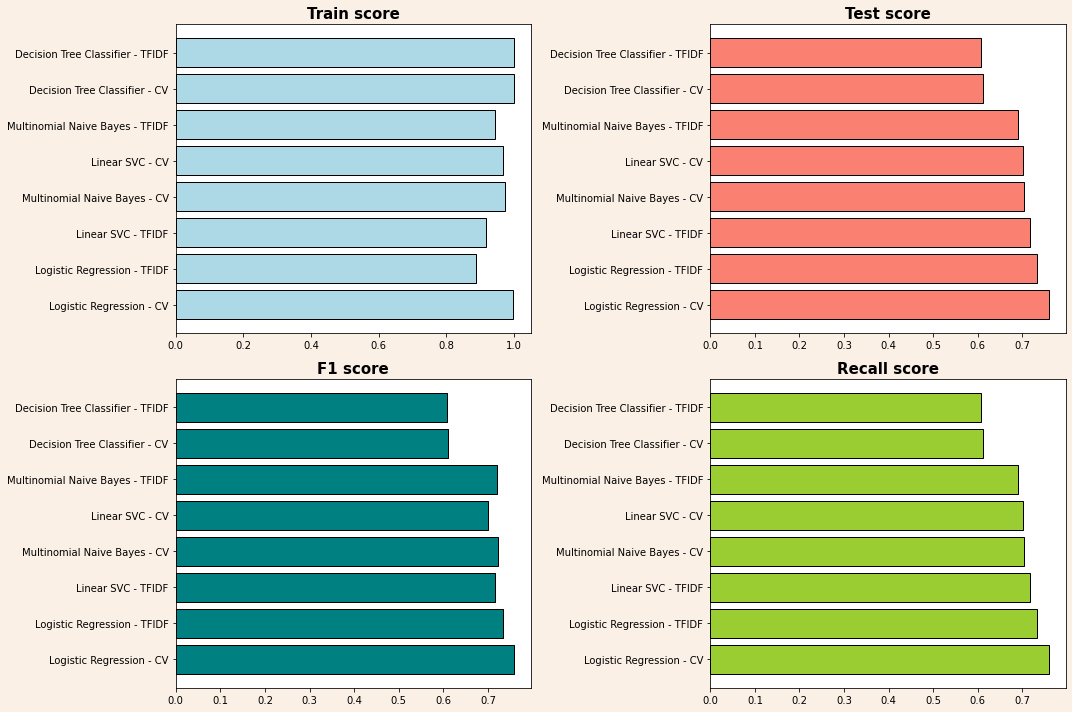

In [ ]:
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2, figsize=(15,10), facecolor='linen')

ax1.barh(width=final_df_cd['Train Score'], y = final_df_cd.index, color='lightblue',edgecolor='black')
ax1.set_title('Train score', fontweight='bold', size=15)

ax2.barh(width=final_df_cd['Test Score'], y = final_df_cd.index, color='salmon', edgecolor='black')
ax2.set_title('Test score', fontweight='bold', size=15)

ax3.barh(width=final_df_cd['F1 Score'], y = final_df_cd.index, color='teal', edgecolor='black')
ax3.set_title('F1 score', fontweight='bold', size=15)

ax4.barh(width=final_df_cd['Recall Scores'], y = final_df_cd.index, color='yellowgreen', edgecolor='black')
ax4.set_title('Recall score', fontweight='bold', size=15)


plt.tight_layout()

# AMAZON REVIEWS ANALYSIS - OFFICE PRODUCTS

In [ ]:
office_sent.head()

,ratings,verified,date,reviewerID,asin,review,summary,unixReviewTime,category,description,...,Sentiment,word_count,char_count,avg_word,polarity,label,year,rating_class_num,review_length,review_length_bin
0,4.0,True,2017-11-07,A2NIJTYWADLK57,0140503528,kids like story really wanted board book one s...,"good story, small size book though",1510012800,"['Office Products', 'Office & School Supplies'...",['Corduroy the bear goes to the launderette wi...,...,Positive,11,62,4.7,-0.016667,1.0,2017,1,11,"(0, 100]"
1,4.0,True,2017-03-07,A2827D8EEURMP4,0140503528,bought used came great condition almost like n...,Good,1488844800,"['Office Products', 'Office & School Supplies'...",['Corduroy the bear goes to the launderette wi...,...,Positive,20,135,5.8,0.625000,1.0,2017,1,20,"(0, 100]"
2,5.0,True,2016-06-25,APB6087F4J09J,0140503528,every story book corduroy fantastic book great...,Best Books for All Children,1466812800,"['Office Products', 'Office & School Supplies'...",['Corduroy the bear goes to the launderette wi...,...,Positive,24,146,5.6,0.425000,1.0,2016,1,22,"(0, 100]"
3,5.0,True,2016-02-21,A2DHERRZIPFU7X,0140503528,purchased book first grade classroom read book...,Great for Math!,1456012800,"['Office Products', 'Office & School Supplies'...",['Corduroy the bear goes to the launderette wi...,...,Positive,44,306,6.0,0.233333,1.0,2016,1,44,"(0, 100]"
4,5.0,False,2015-08-02,A2XCLJRGFANRC,0140503528,spent numerous years elementary school library...,Love Corduroy,1438473600,"['Office Products', 'Office & School Supplies'...",['Corduroy the bear goes to the launderette wi...,...,Positive,61,447,6.3,0.405208,1.0,2015,1,61,"(0, 100]"


## SPLITING THE DATASET INTO TRAIN AND TEST

In [ ]:
# SAMPLING THE DATA INTO A BALANCED DATASET 

In [ ]:
# Separate majority and minority classes
office_pos = office_sent[office_sent['Sentiment']=='Positive']
office_neu = office_sent[office_sent['Sentiment']=='Neutral']
office_neg = office_sent[office_sent['Sentiment']=='Negative']
 

df_office_pos = resample(office_pos, replace=False,n_samples=35000)

df_office_neu = resample(office_neu, replace=True, n_samples=35000)

df_office_neg = resample(office_neg, replace=True, n_samples=35000)

# Combine minority class with downsampled majority class
office_df = pd.concat([df_office_pos, df_office_neu,df_office_neg])

In [ ]:
X = office_df["review"]
y = office_df["Sentiment"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

# Pipeline Model

In [ ]:
f1_list = []
recall_list = []
precision_list = []
train_accuracy_list = []
test_accuracy_list = []

def f1_score1(precision,recall):
    f1 = 2*(precision * recall)/(precision + recall)
    return f1

In [ ]:


def evaluation(pipeline):
    pipeline = pipeline.fit(X_train, y_train)
    global accuracy_train, accuracy_test, precision1, recall1, f1_score, y_pred_test, y_pred_train
  
    y_pred_train = pipeline.predict(X_train)
    y_pred_test = pipeline.predict(X_test)

    accuracy_train=accuracy_score(y_train, y_pred_train)
    accuracy_test=accuracy_score(y_test, y_pred_test)
    precision1 = precision_score(y_test, y_pred_test,average="weighted")
    recall1 = recall_score(y_test, y_pred_test,average="weighted")
    f1_score2 = f1_score1(precision1, recall1)

    print('Accuracy on train %f' %accuracy_train)
    print('Accuracy on test %f' %accuracy_test)
    print("F1 Score", f1_score2)
    print("Precision Score", precision1)
    print("Recall Score", recall1)

    f1_list.append(f1_score2)
    precision_list.append(precision1)
    recall_list.append(recall1)
    train_accuracy_list.append(accuracy_train)
    test_accuracy_list.append(accuracy_test)

# LOGISTIC REGRESSION

## With CountVectorizer

In [ ]:
pipeline_lr_cv_office = Pipeline([
    ('vect', CountVectorizer(analyzer='word', ngram_range=(1, 2))),
    ('clf', LogisticRegression(max_iter=500,random_state=40,solver='newton-cg',multi_class="ovr")),
])

evaluation(pipeline_lr_cv_office)

Accuracy on train 0.990417
Accuracy on test 0.811000
F1 Score 0.8108606363766572
Precision Score 0.8107213206420503
Recall Score 0.811


In [ ]:
pipeline_lr_tfidf_office = Pipeline([
    ('vect', TfidfVectorizer(analyzer='word', ngram_range=(1, 2))),
    ('pipeline_lr_tfidf', LogisticRegression(max_iter=500,random_state=40,solver='newton-cg',multi_class="ovr")),
])

evaluation(pipeline_lr_tfidf_office)

Accuracy on train 0.884060
Accuracy on test 0.761905
F1 Score 0.7614873741209887
Precision Score 0.7610704433948047
Recall Score 0.7619047619047619


# DECISION TREE CLASSIFIER

In [ ]:
pipeline_dt_cv_office = Pipeline([
    ('vect', CountVectorizer(analyzer='word', ngram_range=(1, 2))),
    ('pipeline_dt_cv', DecisionTreeClassifier(criterion= "entropy")),
])

evaluation(pipeline_dt_cv_office)

Accuracy on train 0.999929
Accuracy on test 0.718762
F1 Score 0.7188680119348744
Precision Score 0.7189741504405964
Recall Score 0.7187619047619047


In [ ]:
pipeline_dt_tfidf_office = Pipeline([
    ('vect',TfidfVectorizer(analyzer='word', ngram_range=(1, 2))),
    ('pipeline_dt_tfidf', DecisionTreeClassifier()),
])

evaluation(pipeline_dt_tfidf_office)

Accuracy on train 0.999929
Accuracy on test 0.710333
F1 Score 0.7112387729958234
Precision Score 0.7121465238755345
Recall Score 0.7103333333333334


# MULTINOMIAL NAIVE BAYES

In [ ]:
pipeline_mul_cv_office = Pipeline([
    ('vect', CountVectorizer(analyzer='word', ngram_range=(1, 2))),
    ('clf', MultinomialNB()),
])

evaluation(pipeline_mul_cv_office)
     

Accuracy on train 0.938964
Accuracy on test 0.746762
F1 Score 0.7519313025303813
Precision Score 0.7571727686464661
Recall Score 0.7467619047619047


In [ ]:
pipeline_mul_tfidf_office = Pipeline([
    ('vect', TfidfVectorizer(analyzer='word', ngram_range=(1, 2))),
    ('clf', MultinomialNB()),
])

evaluation(pipeline_mul_tfidf_office)

Accuracy on train 0.921762
Accuracy on test 0.749429
F1 Score 0.7570336398062637
Precision Score 0.7647946403289784
Recall Score 0.7494285714285714


# SUPPORT VECTOR CLASSIFIER

In [ ]:
pipeline_svc_cv_office = Pipeline([
    ('vect', CountVectorizer()),
    ('pipeline_svc_cv',LinearSVC()),
])

evaluation(pipeline_svc_cv_office)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Accuracy on train 0.879298
Accuracy on test 0.728571
F1 Score 0.7279185728262533
Precision Score 0.727266886050991
Recall Score 0.7285714285714285


In [ ]:
pipeline_svc_tfidf_office = Pipeline([
    ('vect',TfidfVectorizer()),
    ('pipeline_svc_tfidf',LinearSVC()),
])

evaluation(pipeline_svc_tfidf_office)

Accuracy on train 0.841762
Accuracy on test 0.726952
F1 Score 0.7264399055808811
Precision Score 0.7259281522539011
Recall Score 0.7269523809523809


In [ ]:
pipe_dict = {0:'Logistic Regression - CV', 
             1:'Logistic Regression - TFIDF', 
             2:'Decision Tree Classifier - CV', 
             3:'Decision Tree Classifier - TFIDF', 
             4:'Multinomial Naive Bayes - CV', 
             5:'Multinomial Naive Bayes - TFIDF',
             6:'Linear SVC - CV', 
             7:'Linear SVC - TFIDF'}

In [ ]:

final_df_office = pd.DataFrame(zip(pipe_dict.values(), train_accuracy_list, test_accuracy_list, f1_list, precision_list, recall_list),
                        columns=['Classifier', 'Train Score', 'Test Score','F1 Score', 'Precision Scores', 'Recall Scores'])

In [ ]:
final_df_office

,Classifier,Train Score,Test Score,F1 Score,Precision Scores,Recall Scores
0,Logistic Regression - CV,0.990417,0.811000,0.810861,0.810721,0.811000
1,Logistic Regression - TFIDF,0.884060,0.761905,0.761487,0.761070,0.761905
2,Decision Tree Classifier - CV,0.999929,0.718762,0.718868,0.718974,0.718762
3,Decision Tree Classifier - TFIDF,0.999929,0.710333,0.711239,0.712147,0.710333
4,Multinomial Naive Bayes - CV,0.938964,0.746762,0.751931,0.757173,0.746762
5,Multinomial Naive Bayes - TFIDF,0.921762,0.749429,0.757034,0.764795,0.749429
6,Linear SVC - CV,0.879298,0.728571,0.727919,0.727267,0.728571
7,Linear SVC - TFIDF,0.841762,0.726952,0.726440,0.725928,0.726952


In [ ]:
final_df_office.sort_values(by='Test Score', ascending=False, inplace=True)

In [ ]:
final_df_office.set_index('Classifier', inplace=True)

In [ ]:
final_df_office

,Train Score,Test Score,F1 Score,Precision Scores,Recall Scores
Classifier,,,,,
Logistic Regression - CV,0.990417,0.811000,0.810861,0.810721,0.811000
Logistic Regression - TFIDF,0.884060,0.761905,0.761487,0.761070,0.761905
Multinomial Naive Bayes - TFIDF,0.921762,0.749429,0.757034,0.764795,0.749429
Multinomial Naive Bayes - CV,0.938964,0.746762,0.751931,0.757173,0.746762
Linear SVC - CV,0.879298,0.728571,0.727919,0.727267,0.728571
Linear SVC - TFIDF,0.841762,0.726952,0.726440,0.725928,0.726952
Decision Tree Classifier - CV,0.999929,0.718762,0.718868,0.718974,0.718762
Decision Tree Classifier - TFIDF,0.999929,0.710333,0.711239,0.712147,0.710333


In [ ]:
print('Model with Highest F1 Score:', final_df_office['Test Score'].idxmax())

Model with Highest F1 Score: Logistic Regression - CV


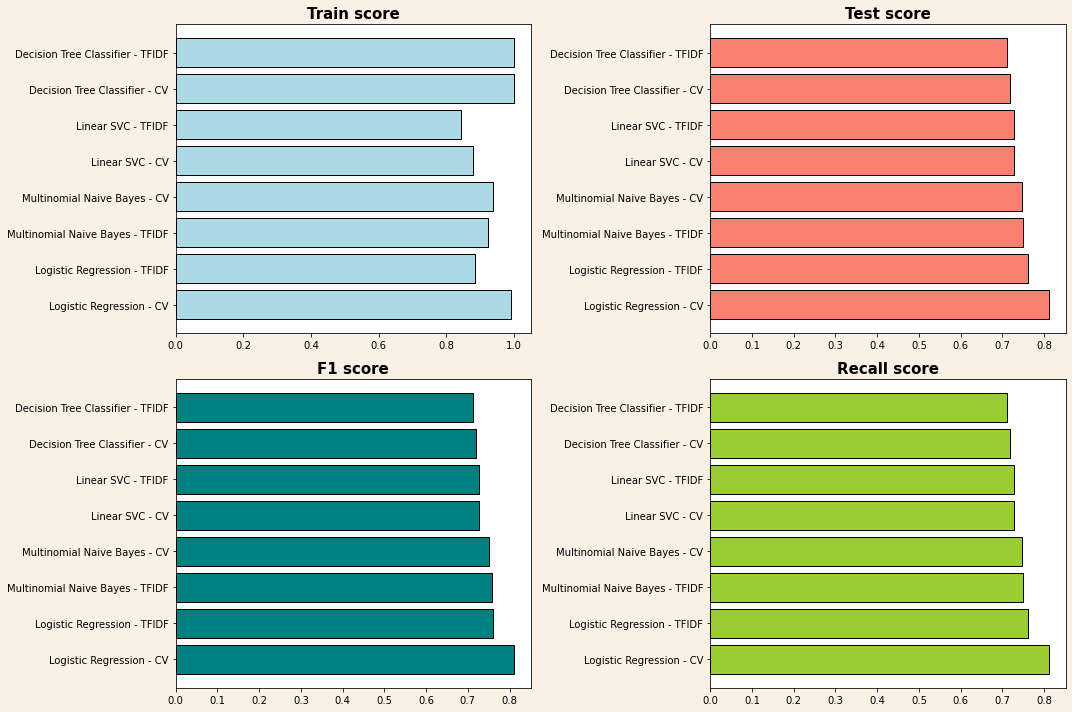

In [ ]:

fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2, figsize=(15,10), facecolor='linen')

ax1.barh(width=final_df_office['Train Score'], y = final_df_office.index, color='lightblue',edgecolor='black')
ax1.set_title('Train score', fontweight='bold', size=15)

ax2.barh(width=final_df_office['Test Score'], y = final_df_office.index, color='salmon', edgecolor='black')
ax2.set_title('Test score', fontweight='bold', size=15)

ax3.barh(width=final_df_office['F1 Score'], y = final_df_office.index, color='teal', edgecolor='black')
ax3.set_title('F1 score', fontweight='bold', size=15)

ax4.barh(width=final_df_office['Recall Scores'], y = final_df_office.index, color='yellowgreen', edgecolor='black')
ax4.set_title('Recall score', fontweight='bold', size=15)


plt.tight_layout()

# PERFORMING HYPERPARAMETER TUNING ON LOGISTIC REGRESSION CV

In [ ]:
params_lr = {'clf__C':[0.5,1,2,,5,3,10], #regularisation parameter: As the value of C increases, it reduces the variance.
            'clf__penalty':['l2']}

In [ ]:
cv = StratifiedKFold(n_splits=7,shuffle=True, random_state=None) 

In [ ]:

pipeline_lr_cv = Pipeline([
    ('vect', CountVectorizer(analyzer='word', ngram_range=(1, 2))),
         ('clf', LogisticRegression(random_state=40,multi_class="ovr"))
])

In [ ]:
gs = GridSearchCV(pipeline_lr_cv, params_lr,cv= cv, verbose=1, n_jobs=-1,scoring='f1_weighted') # will do permutaion and combination of these parameters
gs.fit(X_train, y_train)

Fitting 7 folds for each of 6 candidates, totalling 42 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

GridSearchCV(cv=StratifiedKFold(n_splits=7, random_state=None, shuffle=True),
             estimator=Pipeline(steps=[('vect',
                                        CountVectorizer(ngram_range=(1, 2))),
                                       ('clf',
                                        LogisticRegression(multi_class='ovr',
                                                           random_state=40))]),
             n_jobs=-1,
             param_grid={'clf__C': [0.5, 1, 2, 3, 5, 10],
                         'clf__penalty': ['l2']},
             scoring='f1_weighted', verbose=1)

In [ ]:
df1=pd.DataFrame(gs.cv_results_)
df1

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_clf__C,param_clf__penalty,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,mean_test_score,std_test_score,rank_test_score
0,455.607699,5.011170,3.151899,1.201471,0.5,l2,"{'clf__C': 0.5, 'clf__penalty': 'l2'}",0.792910,0.787967,0.792722,0.789104,0.793514,0.790318,0.787800,0.790619,0.002249,5
1,447.131985,9.892271,2.878039,1.090367,1,l2,"{'clf__C': 1, 'clf__penalty': 'l2'}",0.796235,0.791354,0.797421,0.792133,0.795933,0.792069,0.789692,0.793548,0.002720,1
2,440.626791,7.353948,3.417662,1.323333,2,l2,"{'clf__C': 2, 'clf__penalty': 'l2'}",0.795162,0.792545,0.797431,0.790003,0.797522,0.792106,0.789882,0.793522,0.002990,2
3,438.763444,7.533893,3.279828,1.127411,3,l2,"{'clf__C': 3, 'clf__penalty': 'l2'}",0.795130,0.790966,0.796839,0.790958,0.796072,0.792008,0.788698,0.792953,0.002841,3
4,437.219560,6.862704,4.017234,1.070048,5,l2,"{'clf__C': 5, 'clf__penalty': 'l2'}",0.792593,0.789242,0.795593,0.788330,0.794668,0.791895,0.788460,0.791540,0.002739,4
5,353.502381,139.428811,2.190393,1.142653,10,l2,"{'clf__C': 10, 'clf__penalty': 'l2'}",0.791058,0.788735,0.795586,0.788108,0.791950,0.790186,0.787407,0.790433,0.002584,6


In [ ]:
df1[['param_clf__C','mean_test_score']]

,param_clf__C,mean_test_score
0,0.5,0.790619
1,1,0.793548
2,2,0.793522
3,3,0.792953
4,5,0.791540
5,10,0.790433


In [ ]:
gs.best_params_

{'clf__C': 1, 'clf__penalty': 'l2'}

In [ ]:
params_lr2 = {'clf__penalty':['l2'],
                'clf__C':[8,9,10,12],
                'clf__solver': ['newton-cg','saga', 'sag', 'linlinear']}

In [ ]:
gs1 = GridSearchCV(pipeline_lr_cv, params_lr2,cv= cv, verbose=1, n_jobs=-1,scoring='f1_weighted')
gs1.fit(X_train, y_train)

Fitting 7 folds for each of 16 candidates, totalling 112 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
28 fits failed out of a total of 112.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
28 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty,

GridSearchCV(cv=StratifiedKFold(n_splits=7, random_state=None, shuffle=True),
             estimator=Pipeline(steps=[('vect',
                                        CountVectorizer(ngram_range=(1, 2))),
                                       ('clf',
                                        LogisticRegression(multi_class='ovr',
                                                           random_state=40))]),
             n_jobs=-1,
             param_grid={'clf__C': [8, 9, 10, 12], 'clf__penalty': ['l2'],
                         'clf__solver': ['newton-cg', 'saga', 'sag',
                                         'linlinear']},
             scoring='f1_weighted', verbose=1)

In [ ]:
df2=pd.DataFrame(gs1.cv_results_)
df2

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_clf__C,param_clf__penalty,param_clf__solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,mean_test_score,std_test_score,rank_test_score
0,1848.889112,183.523188,4.783478,0.827854,8,l2,newton-cg,"{'clf__C': 8, 'clf__penalty': 'l2', 'clf__solv...",0.790749,0.793048,0.786435,0.792331,0.794818,0.792086,0.785434,0.790700,0.003229,1
1,530.271629,78.306438,3.994784,1.631199,8,l2,saga,"{'clf__C': 8, 'clf__penalty': 'l2', 'clf__solv...",0.684148,0.682992,0.692926,0.681740,0.685786,0.681942,0.679917,0.684207,0.003957,9
2,438.565735,12.996015,3.448862,0.887404,8,l2,sag,"{'clf__C': 8, 'clf__penalty': 'l2', 'clf__solv...",0.703536,0.701829,0.716564,0.698598,0.703797,0.700927,0.695925,0.703025,0.006095,6
3,29.392948,0.681930,0.000000,0.000000,8,l2,linlinear,"{'clf__C': 8, 'clf__penalty': 'l2', 'clf__solv...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13
4,1798.338284,186.676112,4.013648,1.051578,9,l2,newton-cg,"{'clf__C': 9, 'clf__penalty': 'l2', 'clf__solv...",0.790352,0.793370,0.786454,0.792319,0.793805,0.791916,0.785026,0.790463,0.003181,2
5,519.355046,68.468342,3.455368,0.859849,9,l2,saga,"{'clf__C': 9, 'clf__penalty': 'l2', 'clf__solv...",0.684148,0.682992,0.692926,0.681740,0.685786,0.681942,0.679917,0.684207,0.003957,9
6,422.494465,18.357585,3.198519,0.784459,9,l2,sag,"{'clf__C': 9, 'clf__penalty': 'l2', 'clf__solv...",0.703536,0.701829,0.716564,0.698598,0.703797,0.700927,0.695925,0.703025,0.006095,6
7,29.914241,2.742807,0.000000,0.000000,9,l2,linlinear,"{'clf__C': 9, 'clf__penalty': 'l2', 'clf__solv...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14
8,1805.001078,165.481779,4.083052,0.908062,10,l2,newton-cg,"{'clf__C': 10, 'clf__penalty': 'l2', 'clf__sol...",0.789702,0.792790,0.785995,0.792074,0.793725,0.791799,0.784776,0.790123,0.003219,3
9,500.453631,77.821511,3.204224,0.769496,10,l2,saga,"{'clf__C': 10, 'clf__penalty': 'l2', 'clf__sol...",0.684148,0.682992,0.692926,0.681740,0.685786,0.681942,0.679917,0.684207,0.003957,9


In [ ]:
gs1.best_params_

{'clf__C': 8, 'clf__penalty': 'l2', 'clf__solver': 'newton-cg'}

# FINAL MODEL FOR CD-Vinyl DATASET

In [ ]:
pipeline_lr_cv_cd = Pipeline([
    ('vect', CountVectorizer(analyzer='word', ngram_range=(1, 2))),
         ('clf', LogisticRegression(random_state=40,multi_class="ovr",C=8,penalty="l2",solver="newton-cg",max_iter=500))
])

evaluation(pipeline_lr_cv_cd)

Accuracy on train 0.998869
Accuracy on test 0.809381
F1 Score 0.8094126273162191
Precision Score 0.8094443047307651
Recall Score 0.8093809523809524


In [ ]:
prediction_cd = pipeline_lr_cv_cd.predict(['this is an amazing product'])
print(prediction_cd)

['Positive']


In [ ]:

def customer_review(pipeline):
    review = input('Enter your review:')
    result = pipeline.predict([str(review)])
    if result == 'Positive':
        print('\033[1;32mThis review is Positive\033[0m') # green color
    elif result == 'Neutral':
        print('\033[1;33mThis review is Neutral\033[0m') # yellow color
    else:
        print('\033[1;31mThis review is Negative\033[0m') # red color
    return result

In [ ]:
customer_review(pipeline_lr_cv_cd)


Enter your review:good
This review is Positive


array(['Positive'], dtype=object)

# FINAL MODEL FOR OFFICE PRODUCT DATASET

In [ ]:
pipeline_lr_cv_office = Pipeline([
    ('vect', CountVectorizer(analyzer='word', ngram_range=(1, 2))),
         ('clf', LogisticRegression(random_state=40,multi_class="ovr",C=8,penalty="l2",solver="newton-cg",max_iter=500))
])

evaluation(pipeline_lr_cv_office)

Accuracy on train 0.998869
Accuracy on test 0.809381
F1 Score 0.8094126273162191
Precision Score 0.8094443047307651
Recall Score 0.8093809523809524


In [ ]:
prediction_office = pipeline_lr_cv_office.predict(['this is an bad product'])
print(prediction_office)

['Negative']


In [ ]:
customer_review(pipeline_lr_cv_office)

Enter your review:perfectly did
This review is Positive


array(['Positive'], dtype=object)

In [ ]:

!pip install joblib

Defaulting to user installation because normal site-packages is not writeable


In [ ]:

joblib.dump(pipeline_lr_cv, 'sentiment_analysis_model.pkl')

['sentiment_analysis_model.pkl']

In [ ]:

model = joblib.load('sentiment_analysis_model.pkl')

In [ ]:
model

Pipeline(steps=[('vect', CountVectorizer(ngram_range=(1, 2))),
                ('clf',
                 LogisticRegression(C=8, max_iter=500, multi_class='ovr',
                                    random_state=40, solver='newton-cg'))])